In [32]:
#!pip install missingno

## Predicting ODI 2023 Winner

To predict the winner of upcoming ODI world cup 2023 based on past data

## Importing necessary Libraries

In [2]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Loading Datasets

In [3]:
df  = pd.read_csv("C:\\Users\\DELL\\Desktop\\Last sem Internship\\Datasets\\2019-23_ODI_MatchResults.csv", index_col = [0])
df.sample(5)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
290,Namibia,Oman,Oman,7 wickets,Sharjah,"Mar 11, 2022",ODI # 4364
412,Namibia,U.S.A.,Namibia,6 wickets,Windhoek,"Nov 26, 2022",ODI # 4486
365,West Indies,India,India,119 runs,Port of Spain,"Jul 27, 2022",ODI # 4439
185,England,Australia,Australia,19 runs,Manchester,"Sep 11, 2020",ODI # 4259
423,Namibia,Nepal,Namibia,86 runs,Windhoek,"Dec 7, 2022",ODI # 4497


### Batting Data

In [6]:
bat = pd.read_csv('C:\\Users\\DELL\\Desktop\\Last sem Internship\\Datasets\\Updated_2019-23_Batting.csv', index_col = [0])
bat

,PlayerName,Dissmisal,Runs,Balls,MatchPoints,Fours,Sixes,SR,Position,PlayerTeam
0,Martin Guptill,c Sandakan b NLTC Perera,138,139,-,11,5,99.28,1,New Zealand
1,Colin Munro,c Sandakan b Malinga,13,14,-,1,1,92.85,2,New Zealand
2,Kane Williamson (c),b Pradeep,76,74,-,6,0,102.70,3,New Zealand
3,Ross Taylor,c Prasanna b NLTC Perera,54,37,-,6,2,145.94,4,New Zealand
4,Henry Nicholls,run out (NLTC Perera),15,12,-,1,0,125.00,5,New Zealand
...,...,...,...,...,...,...,...,...,...,...
8354,Kuldeep Yadav,c Head b Abbott,4,17,21,0,0,23.52,9,India
8355,Mohammed Shami,c †Carey b Abbott,0,1,1,0,0,0.00,10,India
8356,Mohammed Siraj,b Starc,0,3,9,0,0,0.00,11,India
8357,Travis Head,not out,51,30,52,10,0,170.00,1,Australia


In [30]:
#bat.info()
#msno.matrix(bat)
bat['Runs'] = pd.to_numeric(bat['Runs'], errors='coerce').astype('Int64')
bat['Balls'] = pd.to_numeric(bat['Balls'], errors='coerce').astype('Int64')
bat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8359 entries, 0 to 8358
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PlayerName   8359 non-null   object
 1   Dissmisal    8359 non-null   object
 2   Runs         8357 non-null   Int64 
 3   Balls        8357 non-null   Int64 
 4   MatchPoints  8359 non-null   object
 5   Fours        8359 non-null   object
 6   Sixes        8359 non-null   object
 7   SR           8359 non-null   object
 8   Position     8359 non-null   int64 
 9   PlayerTeam   8359 non-null   object
dtypes: Int64(2), int64(1), object(7)
memory usage: 734.7+ KB


In [71]:
batA = bat.groupby('PlayerTeam', as_index=False).agg({'Runs':'sum', 'Balls':'sum'})
batA['batAverage'] = batA['Runs']/batA['Balls']


In [103]:
batA.sort_values('batAverage', ascending =False, inplace = True)
batA.shape

(20, 5)

In [102]:
n = np.arange(10., 0, -0.5)
#print(len(n))

batA['rank'] = n
batA

,PlayerTeam,Runs,Balls,batAverage,rank
3,England,13807,13950,0.989749,10.0
4,India,18569,19855,0.93523,9.5
11,Pakistan,11563,12664,0.913061,9.0
1,Australia,14575,15976,0.912306,8.5
14,South Africa,11464,12697,0.90289,8.0
9,New Zealand,11404,12878,0.885541,7.5
18,West Indies,13708,16164,0.848057,7.0
15,Sri Lanka,12015,14248,0.843276,6.5
2,Bangladesh,11729,14082,0.832907,6.0
19,Zimbabwe,7514,9592,0.783361,5.5


### Bowling data

In [49]:
bowl = pd.read_csv('C:\\Users\\DELL\\Desktop\\Last sem Internship\\Datasets\\2019-23_Bowling.csv', index_col = [0])
bowl

,PlayerName,Overs,maidens,Runs,Wickets,Economy,DotBalls,Fours,Sixes,Wides,NoBalls
0,Lasith Malinga,10.0,0,78,2,7.80,21,7,1,4,2
1,Nuwan Pradeep,8.0,0,72,2,9.00,21,8,3,0,1
2,Thisara Perera,10.0,0,80,2,8.00,23,4,5,1,1
3,Seekkuge Prasanna,10.0,0,60,0,6.00,27,4,2,0,0
4,Lakshan Sandakan,10.0,0,64,0,6.40,22,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5598,Lalit Rajbanshi,7.5,2,20,5,2.55,35,1,1,0,0
5599,Sompal Kami,5.0,3,6,1,1.20,27,1,0,0,0
5600,Dipendra Singh Airee,4.0,0,15,1,3.75,17,1,1,0,0
5601,Sandeep Lamichhane,4.0,0,14,2,3.50,14,1,0,0,0


array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [3]:
df.columns = ['team1','team2','winner','margin','ground','match_date','scorecard']
df.sample(5)

,team1,team2,winner,margin,ground,match_date,scorecard
415,New Zealand,India,no result,NaN,Christchurch,"Nov 30, 2022",ODI # 4489
301,South Africa,Bangladesh,Bangladesh,9 wickets,Centurion,"Mar 23, 2022",ODI # 4375
347,West Indies,Bangladesh,Bangladesh,6 wickets,Providence,"Jul 10, 2022",ODI # 4421
299,U.A.E.,Nepal,U.A.E.,99 runs,Dubai (DSC),"Mar 21, 2022",ODI # 4373
327,Pakistan,West Indies,Pakistan,5 wickets,Multan,"Jun 8, 2022",ODI # 4401


## Understanding Data

### Summary of Attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   team1       474 non-null    object
 1   team2       474 non-null    object
 2   winner      474 non-null    object
 3   margin      449 non-null    object
 4   ground      474 non-null    object
 5   match_date  474 non-null    object
 6   scorecard   474 non-null    object
dtypes: object(7)
memory usage: 29.6+ KB


In [5]:
df.describe().T

,count,unique,top,freq
team1,474,20,England,34
team2,474,20,India,42
winner,474,23,India,47
margin,449,137,5 wickets,40
ground,474,97,Al Amerat,23
match_date,474,383,"Jun 4, 2022",3
scorecard,474,474,ODI # 4074,1


<AxesSubplot:>

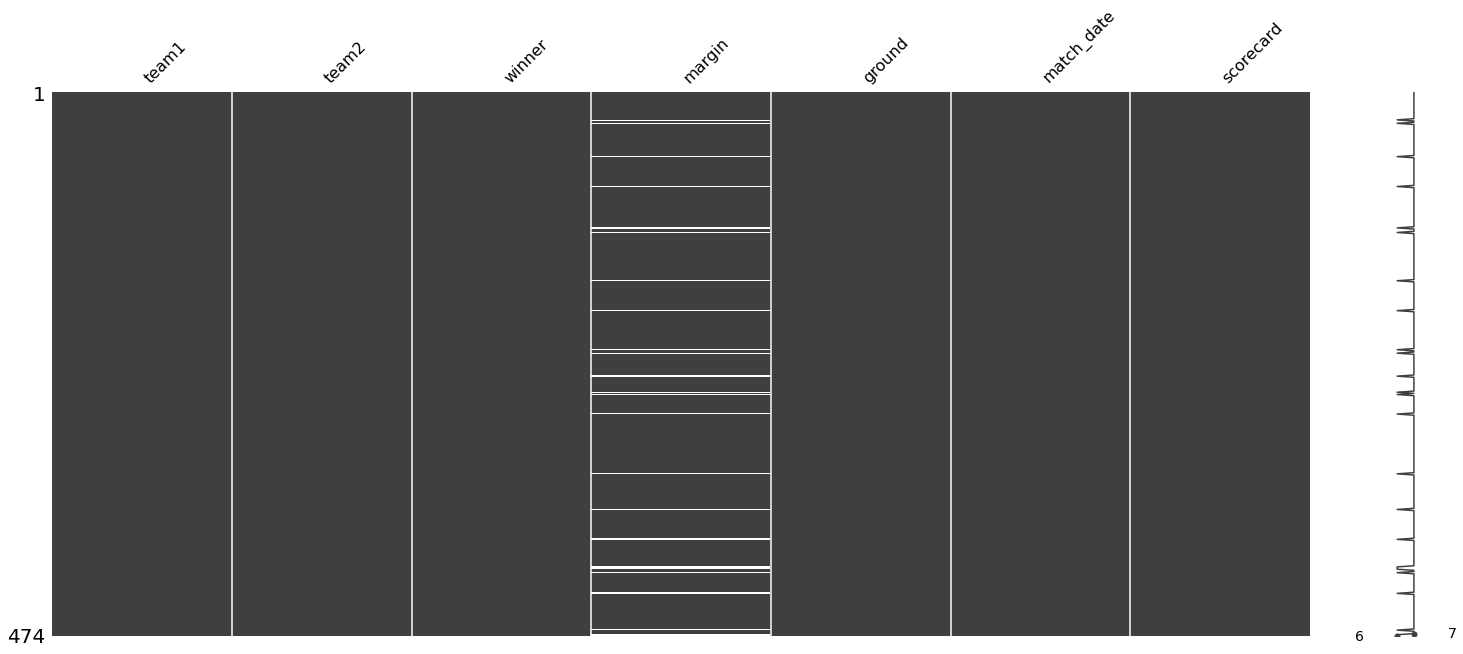

In [6]:
msno.matrix(df)     # to know the missingness in dataset
#msno.bar
#msno.heatmap(df)

## Assessing Data

In [7]:
for col in df.columns:
    #print(f'\033[1m{col}\033[0m: {df[col].unique()}')
    print(f'Unique values in \033[1m{col}\033[0m: {df[col].nunique()}\n')

Unique values in team1: 20

Unique values in team2: 20

Unique values in winner: 23

Unique values in margin: 137

Unique values in ground: 97

Unique values in match_date: 383

Unique values in scorecard: 474



## Cleaning data

In [8]:
#dropping the last two rows 
df = df.drop(df.index[-2:], axis=0)
df

,team1,team2,winner,margin,ground,match_date,scorecard
0,New Zealand,Sri Lanka,New Zealand,45 runs,Mount Maunganui,"Jan 3, 2019",ODI # 4074
1,New Zealand,Sri Lanka,New Zealand,21 runs,Mount Maunganui,"Jan 5, 2019",ODI # 4075
2,New Zealand,Sri Lanka,New Zealand,115 runs,Nelson,"Jan 8, 2019",ODI # 4076
3,Australia,India,Australia,34 runs,Sydney,"Jan 12, 2019",ODI # 4077
4,Australia,India,India,6 wickets,Adelaide,"Jan 15, 2019",ODI # 4078
...,...,...,...,...,...,...,...
467,India,Australia,Australia,10 wickets,Visakhapatnam,"Mar 19, 2023",ODI # 4541
468,Bangladesh,Ireland,no result,NaN,Sylhet,"Mar 20, 2023",ODI # 4542
469,Zimbabwe,Netherlands,Netherlands,3 wickets,Harare,"Mar 21, 2023",ODI # 4543
470,South Africa,West Indies,South Africa,4 wickets,Potchefstroom,"Mar 21, 2023",ODI # 4544


In [9]:
df.shape

(472, 7)

In [10]:
df.isna().sum()

team1          0
team2          0
winner         0
margin        23
ground         0
match_date     0
scorecard      0
dtype: int64

We have 23 missing values for column margin

In [11]:
dff  = df.dropna()

In [12]:
dff.head(5)

,team1,team2,winner,margin,ground,match_date,scorecard
0,New Zealand,Sri Lanka,New Zealand,45 runs,Mount Maunganui,"Jan 3, 2019",ODI # 4074
1,New Zealand,Sri Lanka,New Zealand,21 runs,Mount Maunganui,"Jan 5, 2019",ODI # 4075
2,New Zealand,Sri Lanka,New Zealand,115 runs,Nelson,"Jan 8, 2019",ODI # 4076
3,Australia,India,Australia,34 runs,Sydney,"Jan 12, 2019",ODI # 4077
4,Australia,India,India,6 wickets,Adelaide,"Jan 15, 2019",ODI # 4078


In [13]:
dff = dff.drop(['margin', 'ground','match_date', 'scorecard'], axis = 'columns')
dff

,team1,team2,winner
0,New Zealand,Sri Lanka,New Zealand
1,New Zealand,Sri Lanka,New Zealand
2,New Zealand,Sri Lanka,New Zealand
3,Australia,India,Australia
4,Australia,India,India
...,...,...,...
466,South Africa,West Indies,West Indies
467,India,Australia,Australia
469,Zimbabwe,Netherlands,Netherlands
470,South Africa,West Indies,South Africa


In [14]:
dff = dff.reset_index(drop = True)
#dff.loc[df.winner == df.team1, 'winning_team'] = 1 
#dff.loc[df.winner == df.team2, 'winning_team'] = 2 

y = dff['winner']
y

dff = dff.drop('winner', axis = 1)
dff.head()

,team1,team2
0,New Zealand,Sri Lanka
1,New Zealand,Sri Lanka
2,New Zealand,Sri Lanka
3,Australia,India
4,Australia,India


In [15]:
X2 = pd.get_dummies(dff) 
X2

,team1_Afghanistan,team1_Australia,team1_Bangladesh,team1_England,team1_India,team1_Ireland,team1_Namibia,team1_Nepal,team1_Netherlands,team1_New Zealand,...,team2_Oman,team2_P.N.G.,team2_Pakistan,team2_Scotland,team2_South Africa,team2_Sri Lanka,team2_U.A.E.,team2_U.S.A.,team2_West Indies,team2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
445,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
y

0       New Zealand
1       New Zealand
2       New Zealand
3         Australia
4             India
           ...     
444     West Indies
445       Australia
446     Netherlands
447    South Africa
448       Australia
Name: winner, Length: 449, dtype: object

In [17]:
x_train , x_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 42 )

In [18]:
cls = LogisticRegression()

In [19]:
cls.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = cls.predict(x_test)

In [30]:
y_pred

array(['Nepal', 'Scotland', 'India', 'India', 'Bangladesh', 'Australia',
       'Bangladesh', 'Australia', 'India', 'Scotland', 'West Indies',
       'Namibia', 'Australia', 'Afghanistan', 'Namibia', 'India',
       'Australia', 'Scotland', 'West Indies', 'New Zealand', 'Sri Lanka',
       'Nepal', 'England', 'Pakistan', 'Sri Lanka', 'Oman', 'Afghanistan',
       'Afghanistan', 'Ireland', 'South Africa', 'Oman', 'Nepal', 'India',
       'Namibia', 'Scotland', 'Oman', 'India', 'England', 'Namibia',
       'Nepal', 'Ireland', 'Bangladesh', 'Australia', 'Nepal',
       'Australia', 'Pakistan', 'India', 'Australia', 'Australia',
       'Australia', 'Namibia', 'U.S.A.', 'U.A.E.', 'Bangladesh',
       'New Zealand', 'U.S.A.', 'Nepal', 'New Zealand', 'Pakistan',
       'New Zealand', 'New Zealand', 'Nepal', 'India', 'England',
       'Australia', 'Nepal', 'Australia', 'Sri Lanka', 'Namibia', 'India',
       'Afghanistan', 'Bangladesh', 'West Indies', 'Oman', 'Australia',
       'South Africa'

In [22]:
y_test

285          U.A.E.
296        Scotland
117           India
347           India
70       Bangladesh
           ...     
131        Pakistan
26            India
7      South Africa
408           India
108        Pakistan
Name: winner, Length: 135, dtype: object

In [23]:
cls.score(x_test, y_test)

0.674074074074074

In [28]:
accuracy = accuracy_score(y_test, y_pred)        #total correct instance/ total     Accuracy =  {TP+TN}/{TP+TN+FP+FN}
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred, average='macro')      # accuracy of positive prediction --> Precision = {TP}/{TP+FP}
print("Precision :", precision)
recall = recall_score(y_test, y_pred, average='macro')       #Recall = {TP}/{TP+FN}
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred, average='macro')          #F1-Score = {2 * Precision * Recall}/{Precision + Recall}
print("F1-score  :", F1_score)

Accuracy   : 0.674074074074074
Precision : 0.6697629490392648
Recall    : 0.6611352657004831
F1-score  : 0.6201114762144173


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
